<center><h4>EXPERIMENT 1</h4></center>

<center><h4>HANDWRITTEN DIGIT CLASSIFICATION USING CNN (MNIST DATASET - GRAY SCALE)</h4></center>

#### AIM:
To build and train a Convolutional Neural Network (CNN) model using the MNIST dataset to classify grayscale images of handwritten digits (0–9).

#### PRE-REQUISITES:
1. Basics of Machine Learning
2. Python Programming
3. Knowledge on Numpy, Pandas, Matplotlib, TensorFlow/ Keras
4. Jupyter Notebook
5. Data Pre-Processing Techniques
6. Knowledge on Neural Networks

#### MNIST Dataset

- The MNIST data set contains handwritten single digits from 0 to 9. 
- This data set can be easily accessed with Keras.
- The data set ha 60,000 Training and 10,000 Testing Images.
- Each digit image is a 28x28 Matrix.

<center><img src='MNIST.png' border=1 height=200 width=400></center>

### 1. Importing the Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# It tells Jupyter to display Matplotlib plots directly below the code cell that produced them, inside the notebook.
# You don’t need to call plt.show() 
%matplotlib inline

### 2. Importing the Built-in MNIST dataset from the Keras

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# Load the MNIST dataset as Training and Testing data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape
# 60,000 Images, each image is 28x28 pixel

In [ ]:
# Reading one Image of the MNIST X_train data
X_train[10]

In [ ]:
# Viewing the Image 8 of X_train
plt.imshow(X_train[10])

In [ ]:
# Checking y_train data
y_train

### 3. Pre-Process the Data as required

##### Since, this is classification problem, we need to encode the y_train data, If not, the model assume the y label is a continuous data

In [ ]:
# Import the library
from tensorflow.keras.utils import to_categorical

In [ ]:
# Shape of the y_train
y_train.shape

#### One-hot Encoding the y

In [ ]:
# Convert class labels to one-hot encoding
# num_classes=10 tells the function that your classification task has 10 different classes
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10) 

In [ ]:
# the index of one represents the actual output digit
# the 8th row belongs to digit 1
y_train_cat[10]

#### Scaling the Data

In [ ]:
# Each pixel value of every image is ranging from 0 to 255
# So, normalize every value in between 0 to 1

In [ ]:
# Normalize the pixel values to range [0, 1]
# the max value of any pixel is 255, so dividing each value with 255 will normalize the value to maximum 1
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Re-shaping the Data

In [ ]:
X_train.shape, X_test.shape

- We reshape MNIST images from (28, 28) to (28, 28, 1) because Convolutional Neural Networks (CNNs) require input data to include a channel dimension—and since MNIST images are grayscale, the channel value is 1, making the input shape compatible with <b>CNN layers that expect 3D input: height, width, and channels.</b>

In [ ]:
# Reshape data to add channel dimension (1 for grayscale)

# batch size, height, width, colour channel)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### 4. Build the Model

In [ ]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Create the Model

In [ ]:
# Model Instance
model = Sequential()

In [ ]:
# Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

In [ ]:
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# Flatten Layer
model.add(Flatten())

In [ ]:
# Dense Layers (Fully Connected Layers)
model.add(Dense(128,activation='relu'))

In [ ]:
# Output Layer (For multiclass use softmax)
model.add(Dense(10,activation='softmax'))

#### Compile the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss - Optimizer that adjusts weights to minimize loss
# optimizer - Suitable for multi-class classification with one-hot labels
# accuracy - Track model performance using accuracy metric

### 4. Train the Model

In [ ]:
# Train the model with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [122]:
# Train the model
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test,y_test_cat), callbacks=[early_stop])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9815 - val_loss: 0.0505
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9879 - val_loss: 0.0373
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9884 - val_loss: 0.0386


### 5. Evaluate the Model

In [123]:
# Plot the accuracy because we used accuracy metric while compiling the model
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.960483,0.131335,0.9799,0.060219
1,0.986533,0.044437,0.9815,0.050509
2,0.990483,0.030205,0.9879,0.037265
3,0.993750,0.019710,0.9884,0.038615


<Axes: >

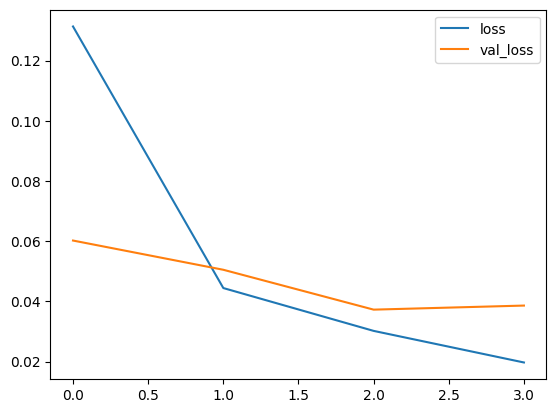

In [124]:
# Plot loss
metrics[['loss', 'val_loss']].plot()

<Axes: >

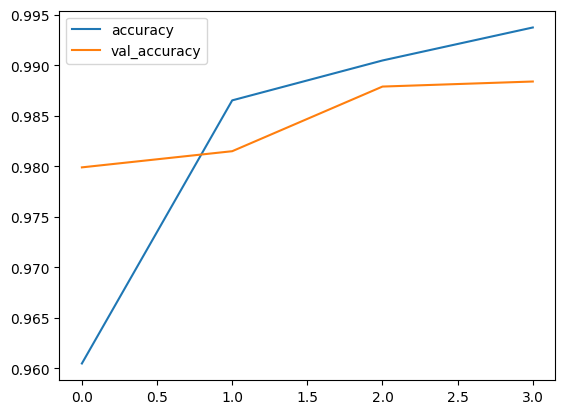

In [125]:
# Plot accuracy
metrics[['accuracy', 'val_accuracy']].plot()

#### Classification report

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
# Get the Classifications on test data
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step


In [128]:
# y_test is one-hot encoded, convert it to class labels too
y_pred = np.argmax(y_pred, axis=1)

In [129]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [130]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[ 977    0    1    0    0    0    1    1    0    0]
 [   1 1128    3    1    0    0    1    0    1    0]
 [   0    0 1024    0    0    0    0    6    2    0]
 [   0    0    0 1004    0    1    0    2    3    0]
 [   0    0    2    0  966    0    4    0    1    9]
 [   2    0    1    8    0  879    2    0    0    0]
 [   6    2    1    0    1    1  945    0    2    0]
 [   0    2    9    0    0    0    0 1012    1    4]
 [   6    0    1    2    0    0    0    2  961    2]
 [   2    2    0    1    4    2    0    7    3  988]]


#### Classiying the new image

In [131]:
from tensorflow.keras.preprocessing import image
from PIL import Image

# Convert to grayscale
new_image = Image.open('two.png').convert('L')

In [132]:
# Resize to 28x28
new_image = new_image.resize((28, 28))                  

In [133]:
new_image

In [134]:
# Convert to NumPy array and normalize
img_array = np.array(new_image)
img_array = img_array / 255.0 

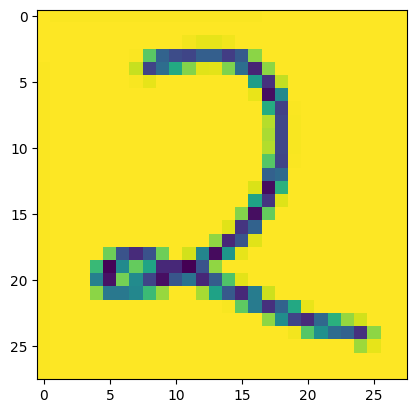

In [135]:
plt.imshow(img_array)

In [136]:
# Reshape to match input shape of model: (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

In [137]:
pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [138]:
np.argmax(pred, axis=1)

array([2])

#### RESULT:
A Convolutional Neural Network (CNN) model was successfully developed and trained using the MNIST dataset to classify grayscale images of handwritten digits (0–9) and the model achieved high accuracy and able to correctly predict digits from custom input images.